In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('max_colwidth', 50)
# set this if you need to

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [3]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str}, encoding = "ISO-8859-1")
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [4]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [5]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [6]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html
combined_df = pd.merge(businesses,pd.merge(inspections,violations,how='outer',on=['date','business_id']),how='outer',
                       on='business_id')

combined_df


,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_address,owner_city,owner_state,owner_zip,Score,date,type,ViolationTypeID,risk_category,description
0,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140807.0,Reinspection/Followup,NaN,NaN,NaN
1,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103129.0,Moderate Risk,Insufficient hot water or running water
2,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,94.0,20140729.0,Routine - Unscheduled,103144.0,Low Risk,Unapproved or unmaintained equipment or utensils
3,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,NaN,20140124.0,Reinspection/Followup,NaN,NaN,NaN
4,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103154.0,Low Risk,Unclean or degraded floors walls or ceilings
5,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103119.0,Moderate Risk,Inadequate and inaccessible handwashing facili...
6,10.0,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,33 Belden St,San Francisco,CA,94104,92.0,20140114.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens
7,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled,103145.0,Low Risk,Improper storage of equipment utensils or linens
8,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20141110.0,Routine - Unscheduled,103116.0,Moderate Risk,Inadequate food safety knowledge or lack of ce...
9,19.0,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,...,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109,94.0,20140214.0,Routine - Unscheduled,103156.0,Low Risk,Permit license or inspection report not posted


In [7]:
# 2 Which ten business have had the most inspections?
#count=pd.DataFrame(combined_df.groupby('business_id').date.nunique())
combined_df.groupby('name').date.nunique().nlargest(10)


name
Peet's Coffee & Tea           74
Starbucks Coffee              61
Whole Foods Market            49
STARBUCKS                     43
STARBUCKS COFFEE              39
San Francisco Soup Company    39
Specialty's Cafe & Bakery     38
Subway Sandwiches             31
Lee's Deli                    30
KENTUCKY FRIED CHICKEN        27
Name: date, dtype: int64

In [8]:
# 3 Group and count the inspections by type
combined_df.groupby('type').date.nunique()

type
Administrative or Document Review      4
Complaint                            622
Complaint Reinspection/Followup      145
Foodborne Illness Investigation       92
Multi-agency Investigation             2
New Construction                     593
New Ownership                        650
Non-inspection site visit            462
Reinspection/Followup                751
Routine - Scheduled                   29
Routine - Unscheduled                792
Special Event                          2
Structural Inspection                 16
Name: date, dtype: int64

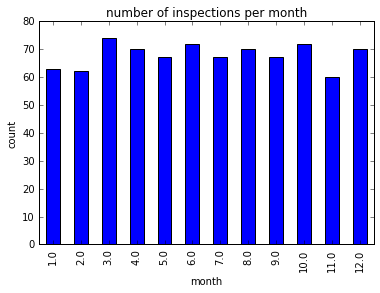

In [9]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

combined_df['month'] = combined_df['date'].apply(lambda x: round((x/100)%100-0.5))
combined_df.groupby('month').date.nunique().plot(kind='bar',title='number of inspections per month')
plt.xlabel('month')
plt.ylabel('count')


In [10]:
# 5 Which zip code contains the most high risk violations?
zipcode=pd.DataFrame(combined_df.groupby(['postal_code','risk_category'])['date'].nunique()).reset_index()
zipcode[zipcode.risk_category=='High Risk'].sort_index(by='date').tail(1)

/Users/heewonwoo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,postal_code,risk_category,date
15,94103,High Risk,242


In [11]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?
#combined_df.groupby('business_id').postal_code.nunique()

In [12]:
# 7 Examining the descriptions, what is the most common violation?
combined_df['description'].describe()

count                                            43951
unique                                              69
top       Unclean or degraded floors walls or ceilings
freq                                              3757
Name: description, dtype: object

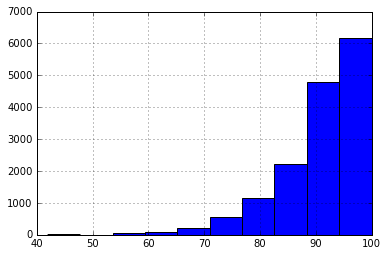

In [13]:
# 8 Create a hist of the scores with 10 bins
inspections.Score.hist(bins=10)

In [14]:
# 9 Can you predict risk category based on the other features in this dataset?

In [15]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [16]:
############################
### A Little More Morbid ###
############################

In [17]:
killings = pd.read_csv('./data/police-killings.csv', encoding = "ISO-8859-1")
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [18]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race
killings=killings.rename(columns = {'lawenforcementagency':'agency','raceethnicity':'race'})
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [19]:
# 2. Show the count of missing values in each column
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [20]:
# 3. replace each null value in the dataframe with the string "Unknown"

killings=killings.fillna(value='Unknown')
killings.head()


,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [21]:
# 4. How many killings were there so far in 2015?
killings[killings['year']==2015].name.nunique()

465

In [22]:
# 5. Of all killings, how many were male and how many female?
killings.groupby('gender')['name'].count()

gender
Female     22
Male      445
Name: name, dtype: int64

In [23]:
# 6. How many killings were of unarmed people?
killings[killings['armed']=='No'].name.nunique()

102

In [24]:
# 7. What percentage of all killings were unarmed?

armed=killings.groupby('armed')['name'].nunique()
armed.apply(lambda x: 100*x/ armed.sum())['No']

21

In [25]:
# 8. What are the 5 states with the most killings?
killings.state.value_counts().head()

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [26]:
# 9. Show a value counts of deaths for each race
killings.groupby('race')['name'].nunique()

race
Asian/Pacific Islander     10
Black                     135
Hispanic/Latino            67
Native American             4
Unknown                    14
White                     236
Name: name, dtype: int64

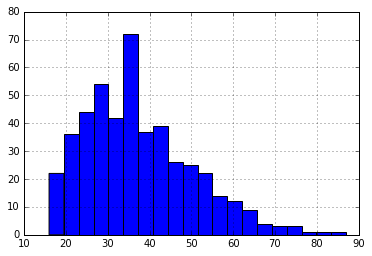

In [27]:
# 10. Display a histogram of ages of all killings
killings.age.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f38590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116984f10>]], dtype=object)

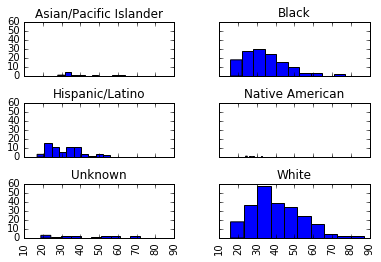

In [28]:
# 11. Show 6 histograms of ages by race
killings.age.hist(by=killings.race, sharex=True, sharey = True)

In [29]:
# 12. What is the average age of death by race?
killings.groupby('race')['age'].mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

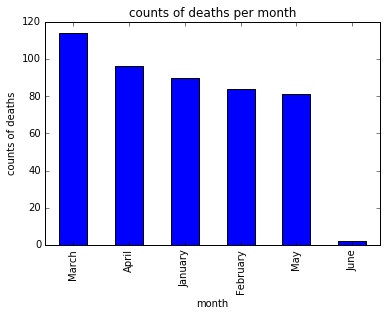

In [30]:
# 13. Show a bar chart with counts of deaths every month
killings.month.value_counts().plot(kind='bar',title='counts of deaths per month')
plt.xlabel('month')
plt.ylabel('counts of deaths')

In [31]:
###################
### Less Morbid ###
###################

In [78]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [79]:
# 1. Delete the columns (employed_full_time_year_round, major_code)
del majors['Employed_full_time_year_round']
del majors['Major_code']

In [80]:
# 2. Show the cout of missing values in each column
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [92]:
# 3. What are the top 10 highest paying majors?
majors.groupby('Major')['Median'].mean().reset_index().sort_index(by='Median',ascending=False).head(10)

C:\Users\Kate Woo\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Median
140,PETROLEUM ENGINEERING,125000
142,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
131,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
112,METALLURGICAL ENGINEERING,96000
133,NUCLEAR ENGINEERING,95000
115,MINING AND MINERAL ENGINEERING,92000
106,MATHEMATICS AND COMPUTER SCIENCE,92000
52,ELECTRICAL ENGINEERING,88000
23,CHEMICAL ENGINEERING,86000
77,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


C:\Users\Kate Woo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


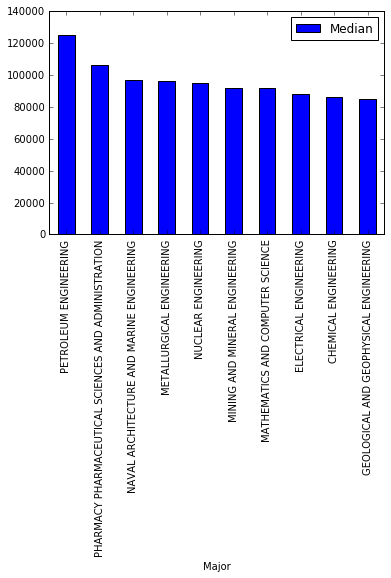

In [117]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

barchar=majors.groupby('Major').Median.mean().reset_index().sort_index(by='Median',ascending=False).head(10)
#barchar.Major.plot(kind='bar',title='top 10 highest paying majors')
barchar.set_index('Major').plot(kind='bar')

In [118]:
# 5. What is the average median salary for each major category?
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [121]:
# 6. Show only the top 5 paying major categories
majors.groupby('Major_category').Median.mean().reset_index().sort_index(by='Median',ascending=False).head()

C:\Users\Kate Woo\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major_category,Median
7,Engineering,77758.620690
5,Computers & Mathematics,66272.727273
13,Physical Sciences,62400.000000
3,Business,60615.384615
8,Health,56458.333333


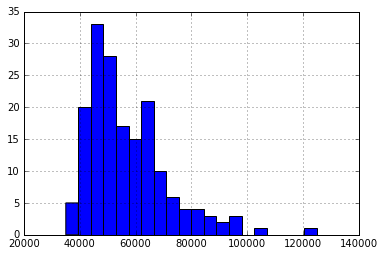

In [125]:
# 7. Plot a histogram of the distribution of median salaries
majors.Median.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001974ECC8C50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000197503F5BA8>]], dtype=object)

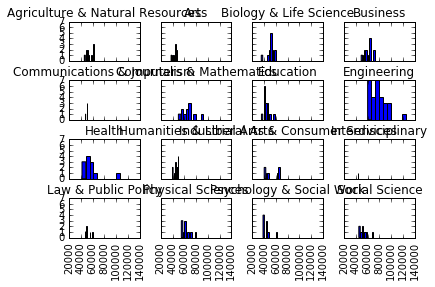

In [129]:
# 8. Plot a histogram of the distribution of median salaries by major category
majors.Median.hist(by=majors.Major_category,bins=10,sharex=True, sharey=True)

In [144]:
# 9. What are the top 10 most UNemployed majors?
majors.groupby('Major').Unemployed.sum().reset_index().sort_index(by='Unemployed',ascending=False).head(10)

C:\Users\Kate Woo\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,Major,Unemployed
22,BUSINESS MANAGEMENT AND ADMINISTRATION,147261
70,GENERAL BUSINESS,85626
152,PSYCHOLOGY,79066
0,ACCOUNTING,75379
31,COMMUNICATIONS,54390
59,ENGLISH LANGUAGE AND LITERATURE,52248
101,MARKETING AND MARKETING RESEARCH,51839
150,POLITICAL SCIENCE AND GOVERNMENT,40376
71,GENERAL EDUCATION,38742
18,BIOLOGY,36757


In [147]:
# What are the unemployment rates?
majors['Unemployed'].sum()/majors['Total'].sum()*100

4.223563263087344

In [153]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?
unemployed= majors.groupby('Major_category')[['Unemployed','Total']].mean()
unemployed['unemployed_rate']=unemployed['Unemployed']/unemployed['Total']*100
unemployed.head()

,Unemployed,Total,unemployed_rate
Major_category,,,
Agriculture & Natural Resources,1855.100000,63243.700000,2.933257
Arts,13015.625000,225733.125000,5.765935
Biology & Life Science,4095.357143,95584.714286,4.284531
Business,33415.153846,758364.692308,4.406212
Communications & Journalism,25299.750000,450955.500000,5.610254


In [158]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042
majors['sample_employment_rate']=majors['Employed']/majors['Total']*100
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_emplyment_rate,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,70.422480,70.422480
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,80.633825,80.633825
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,77.517302,77.517302
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,78.394770,78.394770
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,71.173806,71.173806


In [161]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"
majors['sample_unemployment_rate'] = 100-majors['sample_employment_rate']
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_emplyment_rate,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,70.422480,70.422480,29.577520
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,80.633825,80.633825,19.366175
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,77.517302,77.517302,22.482698
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,78.394770,78.394770,21.605230
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,71.173806,71.173806,28.826194
